# Heart Disease Data Analyzed by Race, Sex, Age and Diabetic Status

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
heart_data = pd.read_csv("heart_2020_cleaned.csv")

In [3]:
heart_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
#Split the data into those with heart disease and those without
yes_heart_disease = heart_data.loc[heart_data["HeartDisease"]=="Yes"]
no_heart_disease = heart_data.loc[heart_data["HeartDisease"]=="No"]

In [69]:
len(heart_data.loc[heart_data["Sex"]=="Male"])

151990

## Race

<AxesSubplot:xlabel='Race'>

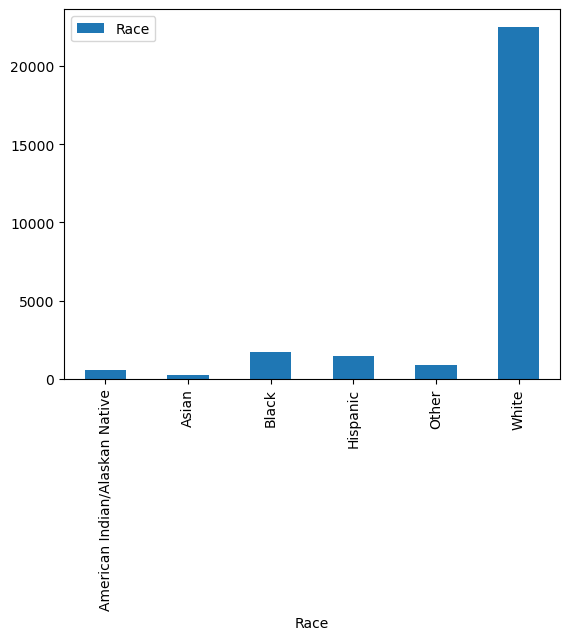

In [5]:
yes_heart_disease.groupby("Race").aggregate({'Race':"count"}).plot(kind="bar",y="Race")

In [6]:
yes_heart_disease.groupby("Race").aggregate({'Race':"count"})

,Race
Race,
American Indian/Alaskan Native,542
Asian,266
Black,1729
Hispanic,1443
Other,886
White,22507


In [7]:
heart_data.groupby("Race").aggregate({'Race':"count"})

,Race
Race,
American Indian/Alaskan Native,5202
Asian,8068
Black,22939
Hispanic,27446
Other,10928
White,245212


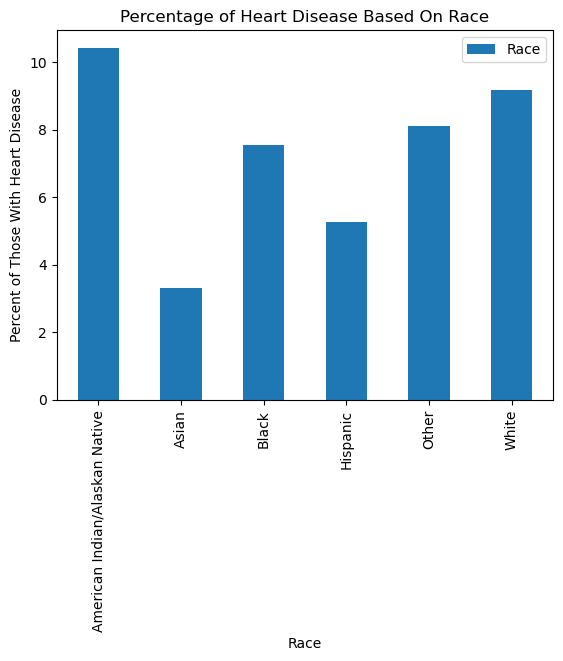

In [61]:
race= (100.0*yes_heart_disease.groupby("Race").aggregate({'Race':"count"})/heart_data.groupby("Race").aggregate({'Race':"count"}))
fig1 = race.plot(kind="bar",y="Race", ylabel="Percent of Those With Heart Disease", xlabel="Race", title="Percentage of Heart Disease Based On Race").get_figure()
fig1.savefig('race.png')

In [9]:
100*(yes_heart_disease.groupby("Race").aggregate({'Race':"count"})/heart_data.groupby("Race").aggregate({'Race':"count"}))

,Race
Race,
American Indian/Alaskan Native,10.419070
Asian,3.296976
Black,7.537382
Hispanic,5.257597
Other,8.107613
White,9.178588


In [10]:
diabetic = heart_data.loc[(heart_data["Diabetic"]=="Yes") | (heart_data["Diabetic"]=="Yes (during pregnancy)") ]

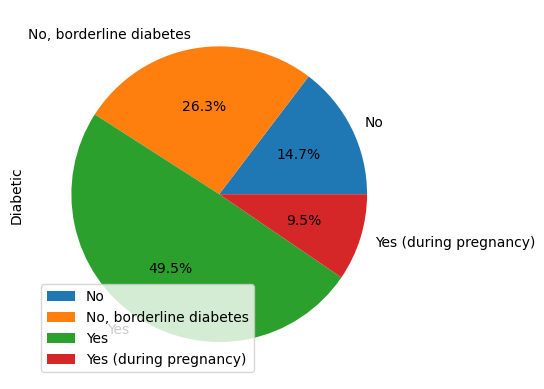

In [39]:
dia = (yes_heart_disease.groupby("Diabetic").aggregate({"Diabetic":"count"})/heart_data.groupby("Diabetic").aggregate({"Diabetic":"count"}))
fig2 = dia.plot(kind="pie", y="Diabetic", autopct="%.1f%%").get_figure()
fig2.savefig("diabetic1.png")

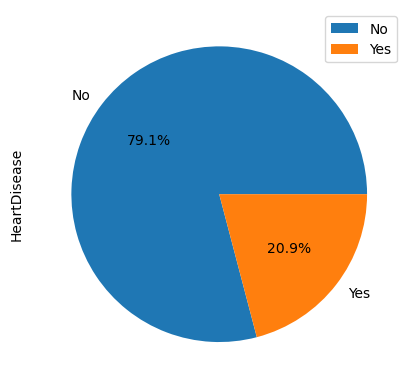

In [62]:
dia_yes_no = diabetic.groupby("HeartDisease").aggregate({"HeartDisease":"count"})
fig_dia = dia_yes_no.plot(kind="pie", y="HeartDisease", autopct="%1.1f%%").get_figure()
fig_dia.savefig("diaheart.png")

<AxesSubplot:ylabel='Sex'>

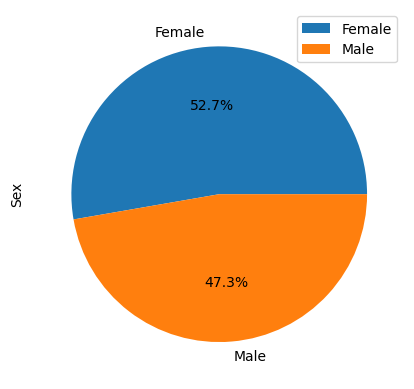

In [13]:
diabetic.groupby("Sex").aggregate({"Sex":"count"}).plot(kind="pie", y="Sex", autopct="%1.1f%%")

In [14]:
diabetic2 = heart_data.loc[(heart_data["Diabetic"]=="Yes") ]

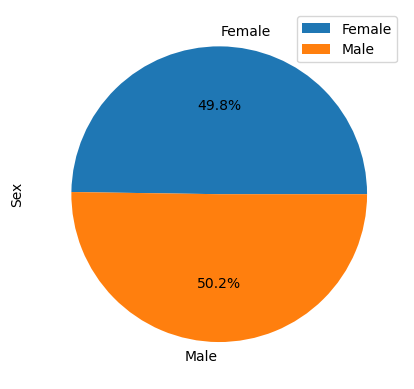

In [40]:
dia2=diabetic2.groupby("Sex").aggregate({"Sex":"count"})
fig3=dia2.plot(kind="pie", y="Sex", autopct="%1.1f%%").get_figure()
fig3.savefig("diabetic2.png")

<AxesSubplot:ylabel='Diabetic'>

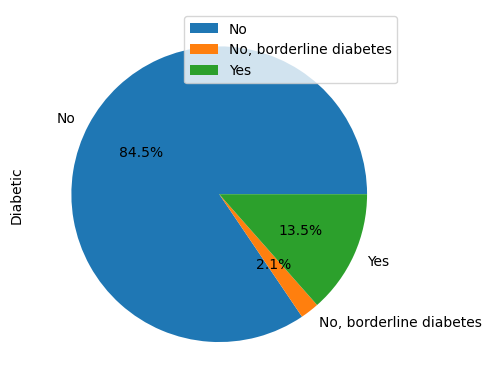

In [16]:
male_data = heart_data.loc[heart_data["Sex"]=="Male"]
male_data.groupby("Diabetic").aggregate({"Diabetic":"count"}).plot(kind="pie", y= "Diabetic", autopct="%1.1f%%")

<AxesSubplot:ylabel='Diabetic'>

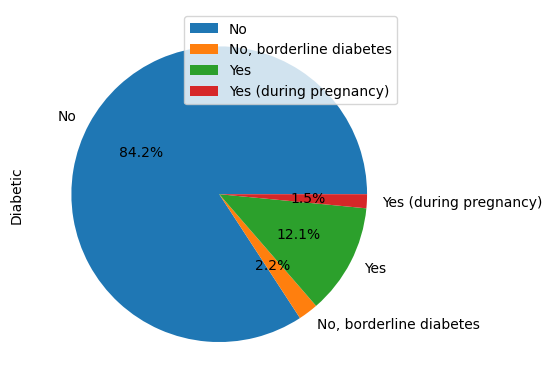

In [17]:
female_data = heart_data.loc[heart_data["Sex"]=="Female"]
female_data.groupby("Diabetic").aggregate({"Diabetic":"count"}).plot(kind="pie", y= "Diabetic", autopct="%1.1f%%")

In [18]:
(diabetic.groupby("Race").aggregate({'Race':"count"})/heart_data.groupby("Race").aggregate({'Race':"count"}))

,Race
Race,
American Indian/Alaskan Native,0.206651
Asian,0.108949
Black,0.201752
Hispanic,0.143700
Other,0.147145
White,0.127347


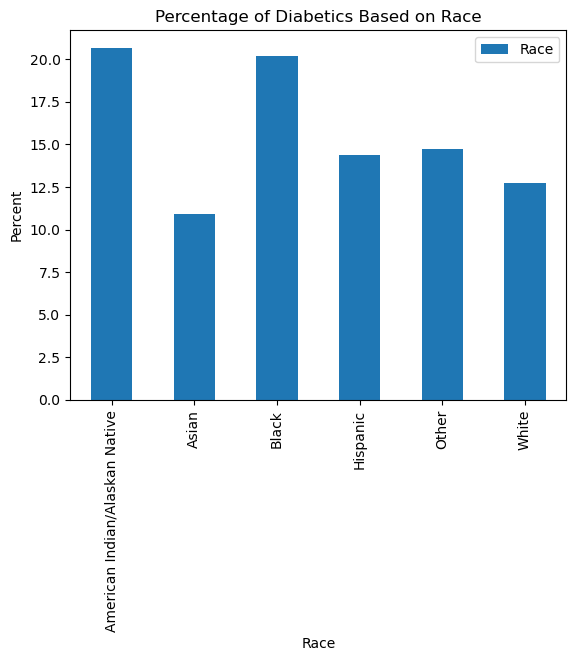

In [60]:
dia3=(100*diabetic.groupby("Race").aggregate({'Race':"count"})/heart_data.groupby("Race").aggregate({'Race':"count"}))
fig4=dia3.plot(kind="bar",y="Race", ylabel="Percent", title="Percentage of Diabetics Based on Race").get_figure()
fig4.savefig("diabetic3.png")

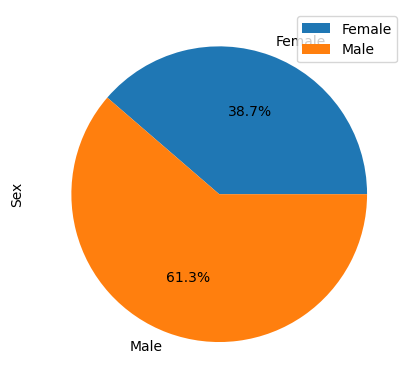

In [65]:
sexy_data = (yes_heart_disease.groupby("Sex").aggregate({"Sex":"count"})/heart_data.groupby("Sex").aggregate({"Sex":"count"}))
sex_fig = sexy_data.plot(kind="pie", y="Sex", autopct="%.1f%%").get_figure()
sex_fig.savefig("sex_heart.png")

In [21]:
physical = heart_data.loc[heart_data["PhysicalActivity"]=="Yes"]

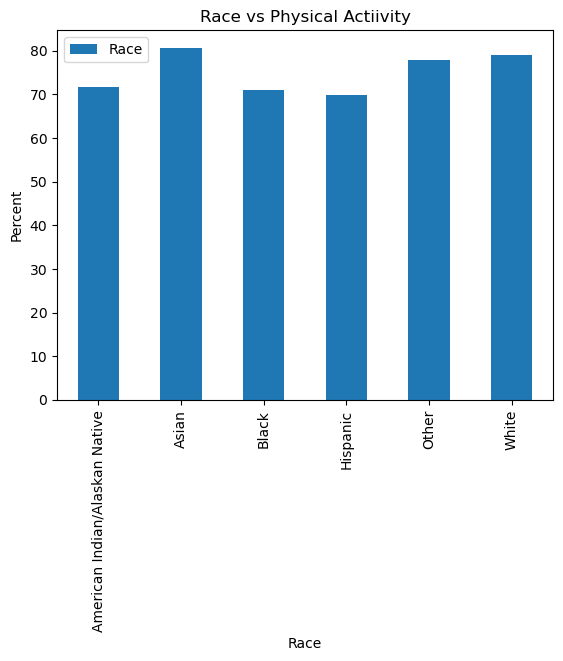

In [59]:
phy=(100*physical.groupby("Race").aggregate({'Race':"count"})/heart_data.groupby("Race").aggregate({'Race':"count"}))
fig5=phy.plot(kind="bar",y="Race", ylabel="Percent", title="Race vs Physical Actiivity").get_figure()
fig5.savefig("phys_vs_race.png")

In [46]:
(100*physical.groupby("Race").aggregate({'Race':"count"})/heart_data.groupby("Race").aggregate({'Race':"count"}))

,Race
Race,
American Indian/Alaskan Native,71.780085
Asian,80.676748
Black,70.975195
Hispanic,69.831669
Other,77.937408
White,79.013262


<AxesSubplot:ylabel='HeartDisease'>

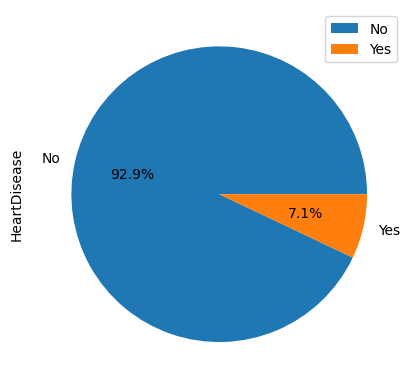

In [24]:
physical.groupby("HeartDisease").aggregate({"HeartDisease":"count"}).plot(kind="pie", y="HeartDisease",  autopct="%.1f%%")

In [53]:
def probability_of_Heart_Disease(race, diabetic, physicalActivity):
    return 100*len(heart_data.loc[(heart_data["Race"]==race)&(heart_data["Diabetic"]==diabetic)&(heart_data["HeartDisease"]=="Yes")&(heart_data["PhysicalActivity"]==physicalActivity)])/len(heart_data.loc[(heart_data["Race"]==race)&(heart_data["Diabetic"]==diabetic)&(heart_data["PhysicalActivity"]==physicalActivity)])

def probability_of_Heart_Disease_2(race, sex, age):
    return 100*len(heart_data.loc[(heart_data["Race"]==race)&(heart_data["Sex"]==sex)&(heart_data["HeartDisease"]=="Yes")&(heart_data["AgeCategory"]==age)])/len(heart_data.loc[(heart_data["Race"]==race)&(heart_data["Sex"]==sex)&(heart_data["AgeCategory"]==age)])

In [54]:
race_vs_diabetic_physical = []

for race in heart_data["Race"].unique():
    for answer in heart_data["Diabetic"].unique():
        for response in heart_data["PhysicalActivity"].unique():
            race_vs_diabetic_physical.append({"Race":race, 
                                                           "Diabetic":answer, 
                                                           "PhysicalActivity":response, 
                                                           "OddsHeartDisease": probability_of_Heart_Disease(race, answer, response)})
            #print(race+" "+answer+" "+response+" "+str(probability_of_Heart_Disease(race, answer, response)))
data = pd.DataFrame(race_vs_diabetic_physical)

In [55]:
data

,Race,Diabetic,PhysicalActivity,OddsHeartDisease
0,White,Yes,Yes,21.089754
1,White,Yes,No,28.147399
2,White,No,Yes,6.015302
3,White,No,No,11.745422
4,White,"No, borderline diabetes",Yes,12.041250
5,White,"No, borderline diabetes",No,18.001652
6,White,Yes (during pregnancy),Yes,3.176796
7,White,Yes (during pregnancy),No,8.641975
8,Black,Yes,Yes,14.477612
9,Black,Yes,No,21.343874


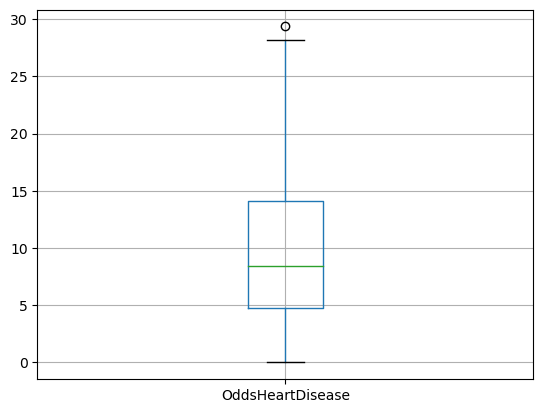

In [57]:
fig6= data.boxplot(column="OddsHeartDisease").get_figure()
fig6.savefig("race_dia_phy.png")

In [29]:
len(heart_data.loc[(heart_data["Race"]=="Asian")&(heart_data["Diabetic"]=="Yes (during pregnancy)")&(heart_data["PhysicalActivity"]=="Yes")])

77

In [30]:
heart_data.groupby(["HeartDisease","Sex"]).aggregate({"HeartDisease":"count"})

HeartDisease
HeartDisease Sex                 
No           Female        156571
             Male          135851
Yes          Female         11234
             Male           16139

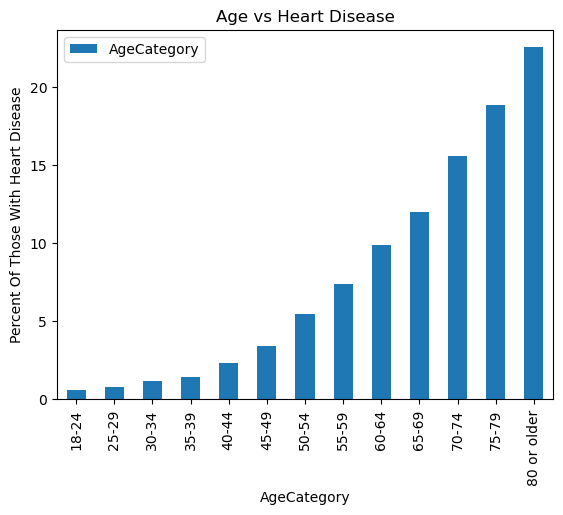

In [70]:
age = (100*yes_heart_disease.groupby("AgeCategory").aggregate({'AgeCategory':"count"})/heart_data.groupby("AgeCategory").aggregate({'AgeCategory':"count"}))
age_fig= age.plot(kind="bar",y="AgeCategory", ylabel="Percent Of Those With Heart Disease", title="Age vs Heart Disease").get_figure()
age_fig.savefig("age.png")

In [32]:
100*(yes_heart_disease.groupby("AgeCategory").aggregate({'AgeCategory':"count"})/heart_data.groupby("AgeCategory").aggregate({'AgeCategory':"count"}))

,AgeCategory
AgeCategory,
18-24,0.617167
25-29,0.784429
30-34,1.205141
35-39,1.440389
40-44,2.313625
45-49,3.414254
50-54,5.448743
55-59,7.399940
60-64,9.876507


In [33]:
race_vs_sex_age = []

for race in heart_data["Race"].unique():
    for sex in heart_data["Sex"].unique():
        for age in heart_data["AgeCategory"].unique():
            race_vs_sex_age.append({"Race":race, 
                                                           "Sex":sex, 
                                                           "AgeCategory":age, 
                                                           "OddsHeartDisease": probability_of_Heart_Disease_2(race, sex, age)})
data_rsa = pd.DataFrame(race_vs_sex_age)

In [34]:
data_rsa

,Race,Sex,AgeCategory,OddsHeartDisease
0,White,Female,55-59,0.054412
1,White,Female,80 or older,0.178739
2,White,Female,65-69,0.076527
3,White,Female,75-79,0.130307
4,White,Female,40-44,0.020217
...,...,...,...,...
151,Hispanic,Male,45-49,0.049223
152,Hispanic,Male,18-24,0.010955
153,Hispanic,Male,35-39,0.023007
154,Hispanic,Male,30-34,0.005556


In [35]:
data_rsa.loc[data_rsa["OddsHeartDisease"]==data_rsa["OddsHeartDisease"].max()]

,Race,Sex,AgeCategory,OddsHeartDisease
92,American Indian/Alaskan Native,Male,80 or older,0.333333


In [36]:
data_rsa.loc[data_rsa["OddsHeartDisease"]==data_rsa["OddsHeartDisease"].min()]

,Race,Sex,AgeCategory,OddsHeartDisease
100,American Indian/Alaskan Native,Male,18-24,0.0


In [37]:
len(heart_data.loc[(heart_data["Race"]=="American Indian/Alaskan Native")&(heart_data["Sex"]=="Male")&(heart_data["AgeCategory"]=="18-24")])

196